In [1]:
# I had issues installing soccerplots so i ran the commands commented out below, restarted the Kernel, and it worked
# https://stackoverflow.com/questions/42321784/jupyter-modulenotfounderror-no-module-named-matplotlib

#import sys  
#!{sys.executable} -m pip install --user soccerplots

In [1]:
# Install needed modules

import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
# read the GcExport.csv in the data folder
# skip the first row since it's not needed

gc_stats = pd.read_csv('data/GcExport.csv', skiprows=1)

In [16]:
# drop the rows with NaN values and assign to gc_stats_pitching_na
# this should remove the Totals row and the row with stat descriptions, leaving only player rows

gc_stats = gc_stats.dropna()

# change the Innings Pitched (IP) column to numeric

gc_stats["IP"] = pd.to_numeric(gc_stats["IP"])
gc_stats["ERA"] = pd.to_numeric(gc_stats["ERA"])
gc_stats["SO.1"] = pd.to_numeric(gc_stats["SO.1"])
gc_stats["WHIP"] = pd.to_numeric(gc_stats["WHIP"])
gc_stats["BB.1"] = pd.to_numeric(gc_stats["BB.1"])
gc_stats["BAA"] = pd.to_numeric(gc_stats["BAA"])
gc_stats["FIP"] = pd.to_numeric(gc_stats["FIP"])
gc_stats["BABIP.1"] = pd.to_numeric(gc_stats["BABIP.1"])
gc_stats["BA/RISP.1"] = pd.to_numeric(gc_stats["BA/RISP.1"])

In [17]:
# creating a new dataframe named gc_stats_pitchers
# using .drop() to select all rows but drop the batting columns

gc_stats_pitching = gc_stats.drop(gc_stats.iloc[:, 3:54], axis = 1)

In [18]:
# make a new dataframe with only players who have innings pitched greater than 0

gc_stats_IP = gc_stats_pitching[gc_stats_pitching["IP"] != 0]

In [37]:
# new dataframe with only the columns we need for the radar chart
# also using .reset_index to clean it up

gc_stats_pitchers_only = gc_stats_IP[["Number", "Last", "First", "IP", "ERA", "SO.1", "WHIP", "BB.1", "BAA", "FIP", "BABIP.1", "BA/RISP.1"]].reset_index()
gc_stats_pitchers_only

,index,Number,Last,First,IP,ERA,SO.1,WHIP,BB.1,BAA,FIP,BABIP.1,BA/RISP.1
0,5,9,V,Lauren,7.2,21.000,2,3.783,8,0.447,6.751,0.455,0.429
1,8,13,W,Kyler,30.1,4.385,16,1.418,13,0.236,3.715,0.264,0.333
2,12,44,R,Taylor,36.2,2.864,39,1.255,7,0.241,1.771,0.317,0.226


In [38]:
#get parameters
params = list(gc_stats_pitchers_only.columns)
params = params[4:]
params

['IP', 'ERA', 'SO.1', 'WHIP', 'BB.1', 'BAA', 'FIP', 'BABIP.1', 'BA/RISP.1']

In [39]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(gc_stats_pitchers_only[params][x])
    a = a - (a*.25)
    
    b = max(gc_stats_pitchers_only[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(gc_stats_pitchers_only['First'])):
    if gc_stats_pitchers_only['First'][x] == 'Kyler':
        a_values = gc_stats_pitchers_only.iloc[x].values.tolist()
    if gc_stats_pitchers_only['First'][x] == 'Taylor':
        b_values = gc_stats_pitchers_only.iloc[x].values.tolist()
        
a_values = a_values[4:]
b_values = b_values[4:]

values = [a_values,b_values]

In [40]:
#title 

title = dict(
    title_name='Kyler',
    title_color = 'red',
    subtitle_name = 'Ballhawks 09',
    subtitle_color = 'red',
    title_name_2='Taylor',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Ballhawks 09',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'Game Changer Data Export'

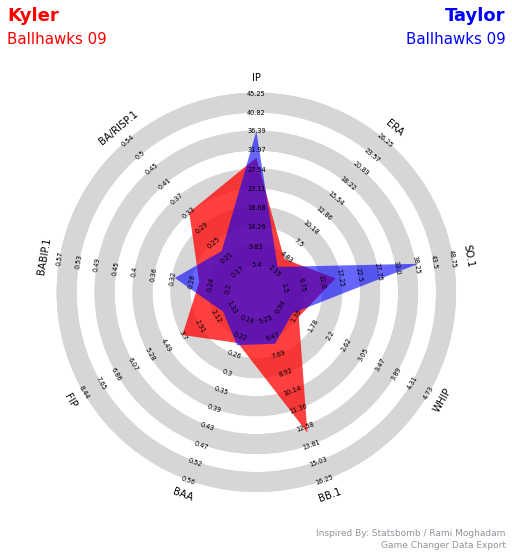

In [41]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)